## How to find p-value for linear regression

https://www.machinelearningplus.com/statistics/p-value/

### P value

- null hypothesis (H0): The null hypothesis assumes there is ‘no effect’ or ‘relationship’ by default. For example: if you are testing if a drug treatment is effective or not, then the null hypothesis will assume there is not difference in outcome between the treated and untreated groups. It simply implies the absence of an effect. For chi square tests it means that there is no difference between expected frequencies and observed frequencies. Its counterpart is the Alternate hypothesis (HA) 
- The P Value basically helps to answer the question: ‘Does the data really represent the observed effect?’. This leads us to a more mathematical definition of P-Value: the P Value is the probability of seeing the effect(E) when the null hypothesis is true. 
\begin{equation}
PValue=P(E|H0) 
\end{equation}
 
When the p-value is low enough, we reject the null hypothesis and conclude the observed effect holds. This level of ‘low enough’ cutoff is called the alpha level, and you need to decide it before conducting a statistical test.

### The code
First, the libraries:

In [2]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image         # para incluir imagenes local

Then the sample data: we will be using the mtcars dataset. In this dataset the specifications of the vehicle and the mileage performance is recorded.

We want to use linear regression to test if one of the specs “the ‘weight’ (wt) of the vehicle” has a significant relationship (linear) with the ‘mileage’ (mpg). 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv', usecols=['mpg', 'wt'])
print (df.count())
df.head()

mpg    32
wt     32
dtype: int64


,mpg,wt
0,4.582576,2.620
1,4.582576,2.875
2,4.774935,2.320
3,4.626013,3.215
4,4.324350,3.440


Null Hypothesis (H0): The slope of the line of best fit (a.k.a beta coefficient) is zero. So: no linear relation between this two variables
Alternate Hypothesis (H1): The beta coefficient is not zero.
To implement the test, use the `smf.ols()` function available in the formula.api of `statsmodels`. You can pass in the formula itself as the first argument and call fit() to train the linear model.


In [4]:
# Train model
model = smf.ols('mpg ~ wt', data=df).fit()

In [6]:
# Results
print(model.summary())

OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.15e-11
Time:                        21:16:12   Log-Likelihood:                -7.3950
No. Observations:                  32   AIC:                             18.79
Df Residuals:                      30   BIC:                             21.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3553      0.194     32.741      0.000       5.959       6.752
w

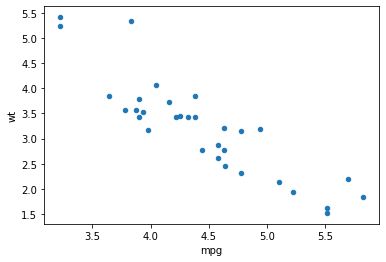

In [7]:
df.plot(kind="scatter", x="mpg", y ="wt" )

In [8]:
# P-Values
print(model.pvalues)

Intercept    4.891527e-25
wt           2.146343e-11
dtype: float64


It is as lineal as the graphic suggest sbeing the p-value 4.8 e-25